In [26]:
# save files
fullproc_r = './resources/' # for words/names

# where to save the figures that are created
fake_figs_dir = './example_lines/' # saving in github only for small numbers
# stop overwriting what is there
#fake_figs_dir = '/Users/jnaiman/Downloads/tmp/JCDL2025/example_lines/'

# format for saving images?
img_format = ['jpeg']

# save diagnostic plot with all items labeled?
save_diagnostic_plot = True

In [27]:
# import matplotlib.pyplot as plt
# plt.errorbar?

In [28]:
# debug
from importlib import reload

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2 as cv
import pickle
import pandas as pd
#import string
from glob import glob
from mpl_toolkits.axes_grid1 import make_axes_locatable
from PIL import ImageColor
import json
import os
from copy import deepcopy
import copy

from utils.metric_utils.utilities import isRectangleOverlap

import time

import matplotlib as mpl
import os
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath} \usepackage{amssymb}' #for \text command

# written libs -- will update locally
from utils.synthetic_fig_utils import subset_by_percent, \
 get_nrows_and_ncols, normalize_params_prob, get_ticks, get_titles_or_labels, \
 get_font_info

import utils.plot_utils
reload(utils.plot_utils)
from utils.plot_utils import get_contour_plot, get_histogram_plot, \
   get_line_plot, get_scatter_plot, make_plot, colorbar_mods, make_base_plot#, get_line_plot

from utils.text_utils import get_popular_nouns, get_inline_math

# create a bunch of fake figures
import utils.synthetic_fig_utils
reload(utils.synthetic_fig_utils)
from utils.synthetic_fig_utils import normalize_params_prob, add_titles_and_labels
from utils.plot_parameters import plot_types_params, panel_params, \
  title_params, xlabel_params, colorbar_params, \
  ylabel_params, aspect_fig_params, dpi_params, tight_layout_params, \
  fontsizes, base

from utils.data_utils import get_data, NumpyEncoder
import numpy as np

import utils.distribution_utils

from utils.plot_utils import markers
marker_sizes = np.arange(0,10)+1
line_list_thick = np.arange(1,10)

use_uniques = True # use unique inlines
verbose = True

from sys import path
path.append('/Library/TeX/texbin/')



# for seed
from sys import maxsize as maxint

import warnings
warnings.filterwarnings("error")

In [29]:
# check directories
img_dir = fake_figs_dir + '/imgs/'
if not os.path.exists(img_dir):
    os.mkdir(img_dir)
    print('made:', img_dir)
json_dir = fake_figs_dir + '/jsons/'
if not os.path.exists(json_dir):
    os.mkdir(json_dir)
    print('made:', json_dir)

In [30]:
# get fonts -- see "cnn_create_synthetic_ticks" in FullProcess
dfont = pd.read_csv(fullproc_r + 'fonts.csv')

# check that location is there
drop_names = []
for fl in dfont['font location']:
    if not os.path.exists(fl):
        drop_names.append(False)
    else:
        drop_names.append(True)

font_names = dfont.loc[drop_names]['font name'].values

# # for plot styles
# plot_styles = plt.style.available

# plot_types_qa = ['line', 'scatter', 'histogram']

plot_styles = ['default']

In [31]:
# stats for doing calculations
stats = {'minimum':np.min, 'maximum':np.max, 'median':np.median, 'mean':np.mean}

# some things to try
aspect_cut = {'min':0.3, 'max':4.0}

In [32]:
# get popular words for titles/axis
popular_nouns = get_popular_nouns(fullproc_r + 'data/')

# get inline math formulas
inlines = get_inline_math(fullproc_r,
                          recreate_inlines=False,
                         use_uniques=use_uniques)

16253 343492
shape of output= (5097, 5)
shape of output= (36332, 5)
number of inlines =  33201


## Update plotting params

### Plot type params

In [33]:
plot_params = plot_types_params.copy()

In [34]:
# probability of getting a line -- only lines here
plot_params['line']['prob'] = 1

# probability of getting a scatter plot
plot_params['scatter']['prob'] = 0
# prob of getting a contour plot
plot_params['contour']['prob'] = 0
# prob for getting a histogram
plot_params['histogram']['prob'] = 0

In [35]:
plot_params['line']['nlines'] = {'min':1, 'max':5}

linestyles = ['-']

### Other parameters

In [36]:
# for ease of things, lets not do equations here
title_params['equation']['prob'] = 0.0 # probability any word will be equation
xlabel_params['equation']['prob'] = 0.0 # probability any word will be equation
ylabel_params['equation']['prob'] = 0.0 # probability any word will be equation

Renormalize all probabilities:

In [37]:
# reload for debug
import utils.synthetic_fig_utils
reload(utils)
reload(utils.synthetic_fig_utils)
from utils.synthetic_fig_utils import normalize_params_prob

plot_params_out, panel_params, \
  title_params, xlabel_params, \
  ylabel_params = normalize_params_prob(plot_params.copy(), panel_params, 
                                        title_params, xlabel_params, 
                                        ylabel_params, colorbar_params)

plot_params_out

title_params capatilize did not add to 1! total = 1.0000000000000002
renormalizing...
now:  {'none': 0.07692307692307693, 'first': 0.3846153846153846, 'all': 0.5384615384615384}
xlabel_params capatilize did not add to 1! total = 1.0000000000000002
renormalizing...
now:  {'none': 0.07692307692307693, 'first': 0.3846153846153846, 'all': 0.5384615384615384}
ylabel_params capatilize did not add to 1! total = 1.0000000000000002
renormalizing...
now:  {'none': 0.07692307692307693, 'first': 0.3846153846153846, 'all': 0.5384615384615384}
colorbar_params capatilize did not add to 1! total = 1.0000000000000002
renormalizing...
now:  {'none': 0.07692307692307693, 'first': 0.3846153846153846, 'all': 0.5384615384615384}
plot_types_params['scatter']['color bar']['location probs'] did not add to 1! total = 0.9999999999999999
renormalizing...
now:  {'right': 0.5882352941176471, 'left': 0.05882352941176471, 'top': 0.29411764705882354, 'bottom': 0.05882352941176471}
plot_types_params['contour']['color b

{'line': {'prob': 1,
  'npoints': {'min': 10, 'max': 11},
  'line thick': {'min': 1, 'max': 5},
  'nlines': {'min': 1, 'max': 5},
  'xmin': -1,
  'xmax': 1,
  'ymin': -1,
  'ymax': 1,
  'prob same x': 0.1,
  'markers': {'prob': 0.5, 'size': {'min': 1, 'max': 20}},
  'error bars': {'elinewidth': {'min': 1, 'max': 5},
   'x': {'prob': 0.25, 'size': {'min': 0.01, 'max': 0.1}},
   'y': {'prob': 0.25, 'size': {'min': 0.01, 'max': 0.1}}},
  'distribution': {'random': {'prob': 0.3333333333333333},
   'linear': {'prob': 0.3333333333333333,
    'intersect': (-100, 100),
    'slope': (-5, 5),
    'noise': (0, 0.25)},
   'gmm': {'prob': 0.3333333333333333,
    'histogram as line': {'prob': 0.25, 'factor': 1000},
    'nclusters': {'min': 1, 'max': 1},
    'nsamples': {'min': 10000, 'max': 10000},
    'cluster std': {'min': -2, 'max': 0.0},
    'noise': {'min': 0.05, 'max': 0.1}}}},
 'histogram': {'prob': 0,
  'npoints': {'min': 10, 'max': 10000},
  'nbins': {'min': 1, 'max': 100},
  'rwidth': {'mi

### Run the thing

In [38]:
# Set a seed if you want a reproducible thing
seed_outer = np.random.randint(maxint)
#seed_outer = 7526304181034464103
seed_outer = 6700012876856450103

print('seed_outer =',seed_outer)
rng_outer = np.random.default_rng(seed_outer)

seed_outer = 6700012876856450103


In [39]:
# "Inner" seed -- for things like distributions and whatnot
seed = np.random.randint(maxint)
#seed = 2870146871786070273
#seed = 7067533564274193147
print('seed = ', seed)
# based on seed, make random number generator, see: https://numpy.org/doc/2.2/reference/random/generator.html
rng = np.random.default_rng(seed)
condition_overlap_xticklabels = True

seed =  9089770023371309583


In [40]:
# set some things to keep standard across images

tight_layout = True

color_map = 'Blues' #rng_outer.choice(plt.colormaps())

plot_style = 'default' #rng_outer.choice(plot_styles)

npanels, panel_style, nrows, ncols = 1, 'square', 1, 1 #get_nrows_and_ncols(panel_params, rng=rng_outer)

aspect_fig = 0.9

dpi =  300 # int(rng_outer.uniform(low=dpi_params['min'], high=dpi_params['max']))

In [41]:
# use the "fixed" RNG outer
# get all font stuffs
title_fontsize, colorbar_fontsize, xlabel_fontsize, ylabel_fontsize, \
    xlabel_ticks_fontsize, ylabel_ticks_fontsize, \
                        csfont = get_font_info(fontsizes, font_names, rng=rng_outer)

In [42]:
choices = []; probs = []
for k,v in plot_params_out.items():
    choices.append(k)
    probs.append(v['prob'])

plot_type = rng.choice(choices, p=probs)
plot_type

np.str_('line')

In [43]:
distribution_type = 'gmm'
xmin, xmax = -1, 1 # for now
ymin,ymax = -1,1 

# now specific for *this plot*
plot_params_here = plot_params_out.copy()

plot_params_here['line']['xmin'] = xmin
plot_params_here['line']['xmax'] = xmax
plot_params_here['line']['ymin'] = ymin
plot_params_here['line']['ymax'] = ymax

plot_params_here['line']['distribution']['gmm']['nclusters'] = {'min': 1, 'max': 1}
plot_params_here['line']['distribution']['gmm']['nsamples'] = {'min': 10000, 'max': 10000}

dist_params = plot_params_here[plot_type]['distribution'] 

In [44]:
dist_params

{'random': {'prob': 0.3333333333333333},
 'linear': {'prob': 0.3333333333333333,
  'intersect': (-100, 100),
  'slope': (-5, 5),
  'noise': (0, 0.25)},
 'gmm': {'prob': 0.3333333333333333,
  'histogram as line': {'prob': 0.25, 'factor': 1000},
  'nclusters': {'min': 1, 'max': 1},
  'nsamples': {'min': 10000, 'max': 10000},
  'cluster std': {'min': -2, 'max': 0.0},
  'noise': {'min': 0.05, 'max': 0.1}}}

In [45]:
import utils.distribution_utils
import utils.data_utils
reload(utils.distribution_utils)
reload(utils.data_utils)
from utils.data_utils import get_data
import utils.plot_classes_utils
reload(utils.plot_classes_utils)

prob_same_x = 1.0

seed = np.random.randint(maxint)
print('seed = ', seed)
rng = np.random.default_rng(seed)

data_for_plot = get_data(plot_params_here[plot_type],
                plot_type=plot_type,
                        distribution=distribution_type, 
                        rng=rng, prob_same_x=prob_same_x)
data_for_plot

seed =  105731463321262766


{'xs': [array([0.88738783, 0.88921381, 0.8942214 , 0.89893408, 0.90430991,
         0.92021316, 0.92336163, 0.92405219, 0.94555397, 0.94782704,
         0.95746116]),
  array([0.88738783, 0.88921381, 0.8942214 , 0.89893408, 0.90430991,
         0.92021316, 0.92336163, 0.92405219, 0.94555397, 0.94782704,
         0.95746116]),
  array([0.88738783, 0.88921381, 0.8942214 , 0.89893408, 0.90430991,
         0.92021316, 0.92336163, 0.92405219, 0.94555397, 0.94782704,
         0.95746116])],
 'ys': [array([-0.69972108, -0.70635414, -0.75774918, -0.76132471, -0.76125719,
         -0.65171822, -0.73835662, -0.68285448, -0.74499962, -0.71812841,
         -0.70371969]),
  array([-0.44029071, -0.52531226, -0.51174422, -0.54603797, -0.49511397,
         -0.52035101, -0.53342377, -0.51014851, -0.47743689, -0.51831711,
         -0.52030455]),
  array([-0.67419129, -0.65753867, -0.67909797, -0.68419982, -0.6643007 ,
         -0.66197389, -0.68640242, -0.65912604, -0.68477399, -0.65583143,
         -0.

In [46]:
data_for_plot['xs']

[array([0.88738783, 0.88921381, 0.8942214 , 0.89893408, 0.90430991,
        0.92021316, 0.92336163, 0.92405219, 0.94555397, 0.94782704,
        0.95746116]),
 array([0.88738783, 0.88921381, 0.8942214 , 0.89893408, 0.90430991,
        0.92021316, 0.92336163, 0.92405219, 0.94555397, 0.94782704,
        0.95746116]),
 array([0.88738783, 0.88921381, 0.8942214 , 0.89893408, 0.90430991,
        0.92021316, 0.92336163, 0.92405219, 0.94555397, 0.94782704,
        0.95746116])]

figsize (w,h) = (1.8, 2)
wrong length for linecolors, setting to default


<Figure size 640x480 with 0 Axes>

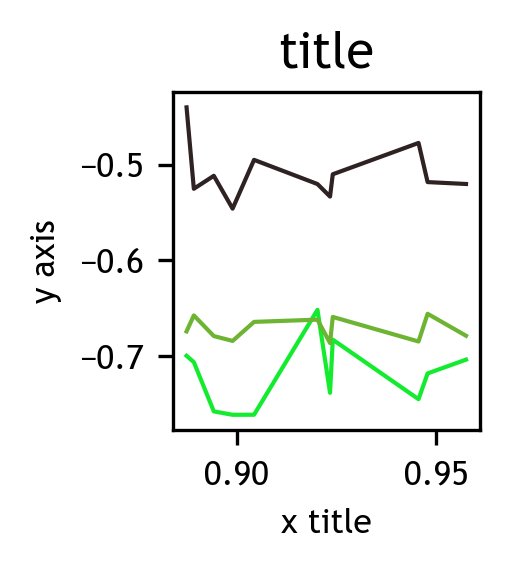

In [47]:
import utils.plot_utils
reload(utils.plot_utils)
from utils.plot_utils import make_plot, make_base_plot


fig, axes, plot_inds = make_base_plot(plot_style, color_map, dpi, nrows, ncols, aspect_fig,
                   base=2, verbose=True, tight_layout = tight_layout)

data_from_plot, ax = make_plot(plot_params_here[plot_type], data_for_plot, 
                        axes[0], plot_type=plot_type, linestyles=linestyles, 
                        rng=rng, lthick=1, linecolors=['blue','cyan']) 
# linecolor=(0,0,0), hasErr = False, lthick=1, nbins=10, rwidth=1.0)


title, xlabel, ylabel = add_titles_and_labels(axes[0], 'x title', 'y axis', 'title', 
                                              title_params, csfont, title_fontsize, 
                          xlabel_params, ylabel_params, xlabel_fontsize, ylabel_fontsize,
                          inlines, xlabel_ticks_fontsize, ylabel_ticks_fontsize,
                          rng=rng)

In [48]:
data_from_plot

{'data': [<matplotlib.lines.Line2D at 0x340596db0>,
 'plot params': {'linethick': [1, 1, 1],
  'linestyles': [np.str_('-'), np.str_('-'), np.str_('-')],
  'markers': ['', '', ''],
  'marker size': [-1, -1, -1],
  'colors': [array([0.0745098 , 0.92156863, 0.18039216, 1.        ]),
   array([0.18431373, 0.13333333, 0.1372549 , 1.        ]),
   array([0.42745098, 0.70588235, 0.19607843, 1.        ])]}}

Loop for several distributions and save:

In [49]:
import utils.synthetic_fig_utils
reload(utils.synthetic_fig_utils)
from utils.synthetic_fig_utils import collect_plot_data_axes

In [50]:
#plot_params_loop['histogram']['distribution']['gmm']

In [51]:
#np.log10(1)

In [52]:

# from utils.figure_gen_utils.pixel_location_utils import get_data_pixel_locations

# def collect_plot_data_axes(ax, 
#                            height, width,
#                            data_from_plot, data_for_plot, plot_type, title, xlabel, ylabel,
#                            distribution_type, verbose=False):
#     """
#     Collect the data from each plot.  Axes-level (per axis)

#     ax : individual axes
#     iplot : plot index
#     """

#     if ax.get_figure() is None:
#         if verbose:
#             print('[WARNING]: ax has no figure, using "fig"')
#         ax.set_figure(fig)
#     ###### get data from plot ######
#     # data_from_plot = data_from_plots[iplot]
#     # data_for_plot = data_for_plots[iplot]
#     # plot_type = plot_types[iplot]
#     # title = titles[iplot]
#     # xlabel = xlabels[iplot]
#     # ylabel = ylabels[iplot]
#     ### JPN -- add back in char label
#     # cbar_label = cbar_labels[iplot]
#     # cbar_word = cbar_words[iplot]

#     data_pixels = get_data_pixel_locations(data_from_plot, plot_type, ax, width, height)

#     # bounding box of square
#     bbox = ax.get_position() # Bbox(x0, y0, x1, y1)
#     xpix1 = np.array([bbox.x0,bbox.x1])
#     ypix1 = np.array([bbox.y0,bbox.y1])
#     xpix1 *= width
#     ypix1 *= height
        
#     # x-tick locations
#     try:
#         xticks = get_ticks(ax, plot_type, 'x', fig=fig, verbose=verbose) # fig is not used for "regular" plots
#     except Exception as e:
#         if verbose:
#             print('[ERROR]: issue getting x-ticks')
#             print('  ', str(e))
#         success_plot = False
#         import sys; sys.exit()
#         #continue

#     # y-tick locations
#     try:
#         yticks = get_ticks(ax, plot_type, 'y', fig=fig, verbose=verbose)
#     except Exception as e:
#         if verbose:
#             print('[ERROR]: issue getting y-ticks')
#             print('  ', str(e))
#             import sys; sys.exit()
#         success_plot = False
#         #continue
    
#     #### JPN -- come back and add colorbars!
#     # # for colorbars
#     # colorbar_ticks = []
#     # cbar_bbox = None; cbar_text = None
#     # if 'color bar' in data_from_plot:
#     #     colorbar = data_from_plot['color bar']
#     #     if data_from_plot['color bar params']['side'] == 'left' \
#     #         or data_from_plot['color bar params']['side'] == 'right':
#     #         cbarax = 'y'
#     #     else:
#     #         cbarax = 'x'
#     #     try:
#     #         colorbar_ticks = get_ticks(colorbar, plot_type, cbarax, fig=fig, verbose=verbose)
#     #     except Exception as e:
#     #         if verbose:
#     #             print('[ERROR]: issue getting colorbar ticks')
#     #             print('  ', str(e))
#     #             success_plot = False

        
#     # Get the bounding box of the title in display space
#     if title != '':
#         title_bbox = title.get_window_extent()#dpi=dpi)
#         title_words = title.get_text()
#     else:
#         title_bbox = -1
#         title_words = ''

#     # xlabel
#     xlabel_bbox = xlabel.get_window_extent()#dpi=dpi)
#     xlabel_words = xlabel.get_text()
#     # ylabel
#     ylabel_bbox = ylabel.get_window_extent()#dpi=dpi)
#     ylabel_words = ylabel.get_text()

#     # get offset text
#     yoffset_text_obj = ax.yaxis.get_offset_text()
#     yoffset_text = yoffset_text_obj.get_text()
#     yoffset_text_bbox = None
#     if yoffset_text != '':
#         yoffset_text_bbox = yoffset_text_obj.get_window_extent()
#     # also for x
#     xoffset_text_obj = ax.xaxis.get_offset_text()
#     xoffset_text = xoffset_text_obj.get_text()
#     xoffset_text_bbox = None
#     if xoffset_text != '':
#         xoffset_text_bbox = xoffset_text_obj.get_window_extent()

#     ####### SAVE THE DATA ######

#     # line plot 
#     #plot_name = 'plot' + str(iplot) 
#     datas = {}
#     # line plot type
#     datas['type'] = plot_type # tag for kind of plot
#     datas['distribution'] = distribution_type
#     datas['data'] = data_for_plot
#     if data_pixels != {}:
#         datas['data pixels'] = data_pixels
#     datas['data from plot'] = json.loads(json.dumps(data_from_plot, cls=NumpyEncoder))
#     if (plot_type == 'scatter' or plot_type == 'contour' or plot_type == 'image of the sky') and 'color bar' in data_from_plot:
#         #print('yes indeed')
#         try:
#             w = data_from_plot['color bar'].get_window_extent()#dpi=dpi)
#         except:
#             w = data_from_plot['color bar'].get_window_extent()
#         datas['color bar'] = {'xmin':w.x0,'ymin':w.y0,
#                                             'xmax':w.x1,'ymax':w.y1, 
#                                             'params':data_from_plot['color bar params']}
        

#         ##### JPN -- come back and add colorbars
#         # # is it an image of the sky? (WCAxes)
#         # if cbar_ax != []: # placeholder for no colorbar
#         #     colorbar_label = None
#         #     colorbar_offset_text = None
#         #     if hasattr(cbar_ax, 'coords'):
#         #         # have text
#         #         for cbar_axc in cbar_ax.coords:
#         #             if cbar_axc._axislabels.get_text() != '':
#         #                 cbar_text = cbar_axc._axislabels.get_text()
#         #                 cbar_bbox = cbar_axc._axislabels.get_window_extent()
#         #                 colorbar_label = {'text':cbar_text, 
#         #                                     'xmin':cbar_bbox.x0, 
#         #                                     'ymin':cbar_bbox.y0,
#         #                                     'xmax':cbar_bbox.x1,
#         #                                     'ymax':cbar_bbox.y1}
#         #                 print('colorbar_label is (WCAxes):', colorbar_label)
#         #                 #print("HAVE TO CHECK FOR OFFSET TEXT")
#         #                 #import sys; sys.exit()
#         #         # try this
#         #         yoff = cbar_ax.yaxis.get_offset_text() #get_text()
#         #         xoff = cbar_ax.yaxis.get_offset_text()
#         #         if xoff.get_text() != '' and yoff.get_text() != '':
#         #             print('both x & y have offset text and I dont know how to deal!')
#         #             import sys; sys.exit()
#         #         elif xoff.get_text() != '':
#         #             cbar_offset_text = xoff
#         #         else:
#         #             cbar_offset_text = yoff # either something or nothing
#         #         if cbar_offset_text.get_text() != '':
#         #             cbar_ot_bb = cbar_offset_text.get_window_extent()
#         #             colorbar_offset_text = {'text':cbar_offset_text.get_text(), 
#         #                                     'xmin':cbar_ot_bb.x0, 
#         #                                     'ymin':cbar_ot_bb.y0,
#         #                                     'xmax':cbar_ot_bb.x1,
#         #                                     'ymax':cbar_ot_bb.y1}
#         #     elif hasattr(cbar_ax, '_colorbar'):
#         #         # check both x & y
#         #         if cbar_ax.yaxis.label.get_text() != '':
#         #             cbar_text = cbar_ax.yaxis.label.get_text()
#         #             cbar_bbox = cbar_ax.yaxis.label.get_window_extent()
#         #             cbar_offset_text = cbar_ax.yaxis.get_offset_text()
#         #         elif cbar_ax.xaxis.label.get_text() != '':
#         #             cbar_text = cbar_ax.xaxis.label.get_text()
#         #             cbar_bbox = cbar_ax.xaxis.label.get_window_extent()
#         #             cbar_offset_text = cbar_ax.xaxis.get_offset_text()
#         #         else:
#         #             print('no label for colorbar!')
#         #             cbar_text = ''
#         #             cbar_offset_text = cbar_ax.xaxis.get_offset_text() # placeholder
#         #         # cbar_text = cbar_ax.get_ylabel()
#         #         # cbar_bbox = cbar_ax.get_window_extent()
#         #         if cbar_text != '':
#         #             colorbar_label = {'text':cbar_text, 
#         #                                     'xmin':cbar_bbox.x0, 
#         #                                     'ymin':cbar_bbox.y0,
#         #                                     'xmax':cbar_bbox.x1,
#         #                                     'ymax':cbar_bbox.y1}
#         #             print('colorbar_label is (matplotlib):', colorbar_label)
#         #         #import sys; sys.exit()
#         #         if cbar_offset_text.get_text() != '':
#         #             cbar_ot_bb = cbar_offset_text.get_window_extent()
#         #             colorbar_offset_text = {'text':cbar_offset_text.get_text(), 
#         #                                     'xmin':cbar_ot_bb.x0, 
#         #                                     'ymin':cbar_ot_bb.y0,
#         #                                     'xmax':cbar_ot_bb.x1,
#         #                                     'ymax':cbar_ot_bb.y1}
#         #     else:
#         #         print('not sure what kind of colorbar this is!')
#         #         import sys; sys.exit()

#         #     if colorbar_label is None:
#         #         print('colorbar_label is None for iplot =', iplot, '!')
#         #         #import sys; sys.exit()
#         #     else:
#         #         datas['color bar']['label'] = colorbar_label.copy()

#         #     if colorbar_offset_text is None:
#         #         pass
#         #     else:
#         #         datas['color bar']['offset text'] = colorbar_offset_text.copy()

#     xtmp = []
#     for xt in xticks:
#         l = {'data':xt[0], 'xmin': xt[1], 
#                 'ymin': xt[2], 
#                 'xmax':xt[3], 'ymax':xt[4],
#                 'tx':xt[5], 'ty':xt[6]}
#         xtmp.append(l)
#     datas['xticks'] = xtmp.copy()
#     # 
#     xtmp = []
#     for xt in yticks:
#         l = {'data':xt[0], 'xmin': xt[1], 
#                 'ymin': xt[2], 
#                 'xmax':xt[3], 'ymax':xt[4], 
#             'tx':xt[5], 'ty':xt[6]}
#         xtmp.append(l)
#     datas['yticks'] = xtmp.copy()
#     ##### JPN -- come back for colorbars
#     # if len(colorbar_ticks) > 0:
#     #     xtmp = []
#     #     for xt in colorbar_ticks:
#     #         l = {'data':xt[0], 'xmin': xt[1], 
#     #                 'ymin': xt[2], 
#     #                 'xmax':xt[3], 'ymax':xt[4], 
#     #             'tx':xt[5], 'ty':xt[6]}
#     #         xtmp.append(l)
#     #     datas['color bar ticks'] = xtmp.copy()
        
#     # axis box
#     datas['square'] = {'xmin':xpix1[0], 'ymin':ypix1[0], 
#                                         'xmax':xpix1[1], 'ymax':ypix1[1]}
#     # title
#     if title_bbox != -1:
#         datas['title'] = {'xmin':title_bbox.x0, 'ymin':title_bbox.y0, 
#                                         'xmax':title_bbox.x1, 'ymax':title_bbox.y1,
#                                         'words':title_words}
#     else:
#         pass
#     datas['xlabel'] = {'xmin':xlabel_bbox.x0, 'ymin':xlabel_bbox.y0, 
#                                     'xmax':xlabel_bbox.x1, 'ymax':xlabel_bbox.y1,
#                                     'words':xlabel_words}
#     datas['ylabel'] = {'xmin':ylabel_bbox.x0, 'ymin':ylabel_bbox.y0, 
#                                     'xmax':ylabel_bbox.x1, 'ymax':ylabel_bbox.y1,
#                                     'words':ylabel_words}
#     # offset text
#     for lt,lbb,t in zip([xoffset_text,yoffset_text],
#                         [xoffset_text_bbox,yoffset_text_bbox], ['x','y']):
#         if lt != '': # have something
#             datas[t + '-offset text'] = {'xmin':lbb.x0, 
#                                                     'ymin':lbb.y0, 
#                                     'xmax':lbb.x1, 'ymax':lbb.y1,
#                                     'words':lt}
            
#     return datas

In [53]:
# def init_qa_pairs():
#     """
#     Set format for qa pairs part of JSON
#     """
#     # create qa pairs
#     qa_pairs = {}
#     # question levels    
#     qa_pairs['Level 1'] = {}
#     qa_pairs['Level 2'] = {}
#     qa_pairs['Level 3'] = {}
#     qa_pairs['Level 1']['Figure-level questions'] = {} # Figure-level questions
#     qa_pairs['Level 1']['Plot-level questions'] = {}
#     qa_pairs['Level 2']['Plot-level questions'] = {}
#     qa_pairs['Level 3']['Plot-level questions'] = {}
#     return qa_pairs

import utils.plot_qa_utils
reload(utils.plot_qa_utils)
from utils.plot_qa_utils import init_qa_pairs

In [54]:
img_dir

'./example_lines//imgs/'

wrong length for linecolors, truncating
QUESTION: You are a helpful assistant that can analyze images.  How many lines are there in the specified figure panel? Please format the output as a json as {"nlines":""} for this figure panel, where the "nlines" value should be an integer.
ANSWER: {'nlines': 4}
QUESTION: You are a helpful assistant that can analyze images.  What are the minimumalong the x-axis  data values in this figure panel?  Please format the output as a json as {"minimum x":"[]"} for this figure panel, where the "minimum x" value should be a list of floats, calculated from the data values used to create the plot.
ANSWER: {'minimum x': {'plot0': {'minimum x': [np.float64(0.2678921843133374), np.float64(0.24726187345038128), np.float64(0.27915931111120584), np.float64(0.27224475543852666)]}}}
QUESTION: You are a helpful assistant that can analyze images.  What are the maximumalong the x-axis  data values in this figure panel?  Please format the output as a json as {"maximum 

<Figure size 640x480 with 0 Axes>

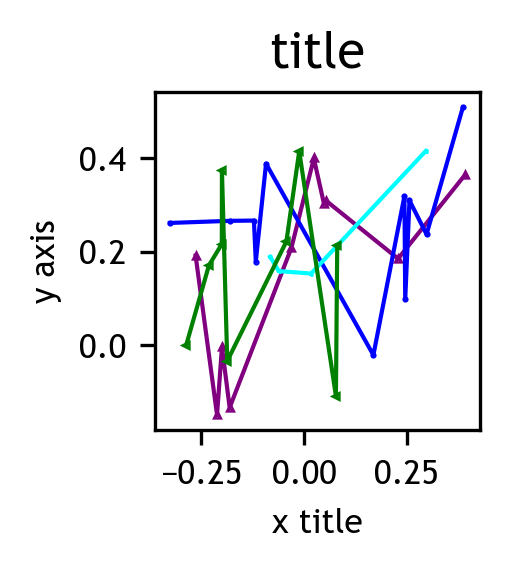

In [58]:
# reload(utils.histogram_plot_qa_utils)
# from utils.histogram_plot_qa_utils import q_nbars_hist_plot_plotnums, q_stats_hists, q_gmm_ngaussians_hists

import utils.linear_plot_qa_utils
import utils.plot_utils
reload(utils.linear_plot_qa_utils)
reload(utils.plot_utils)
from utils.linear_plot_qa_utils import q_nlines_plot_plotnums, q_stats_lines
from utils.plot_utils import make_plot


## start the thing

nclusters = [1, 2, 3, 4, 5]

cluster_std = {'min':-2, 'max':0.0} # in 10^

noise = {'min': 0.05, 'max': 0.1}

linecolors = ['purple','blue','cyan','green', 'yellow', 'orange', 'red', 'magenta']

plot_json = []

ntrials = 10

verbose_qa = True

# check for github
if 'LLM_VQA_JCDL2025' in fake_figs_dir and ntrials > 10:
    print('Limiting trials for saving in github.  Change the "fake_figs_dir" param to a local address')
    ntrials = 10

for n in range(ntrials):
    for nclust in nclusters:

        # this becomes more important when we have multiple axes and more complex plots
        data_for_plots = []
        plot_types = []
        data_from_plots = []
        titles = []; xlabels = []; ylabels = []; 
        cbars = []; cbar_labels = []; cbar_words = []; cbar_nums = []
        end_time = time.time()
        distribution_types = []
        # in case axes change
        axes_save = []; cbar_axes_save = []

        plot_params_loop = plot_params_here.copy()
        plot_params_loop['line']['distribution']['gmm']['nclusters'] = {'min': nclust, 'max': nclust}
        plot_params_loop['line']['distribution']['gmm']['cluster std'] = cluster_std
        plot_params_loop['line']['distribution']['gmm']['noise'] = noise
        data_for_plot = get_data(plot_params_loop[plot_type],
                        plot_type=plot_type,
                                distribution=distribution_type, 
                                rng=rng)
        # pltjson = {}
        # pltjson['nclusters'] = nclust
        # pltjson['data for plot'] = data_for_plot.copy()

        fig, axes, plot_inds = make_base_plot(plot_style, color_map, dpi, 
                                              nrows, ncols, aspect_fig,
                        base=2, verbose=False, tight_layout = tight_layout)

        for iplot, ax in enumerate(axes):
            data_from_plot, ax = make_plot(plot_params_here[plot_type], data_for_plot, 
                                    axes[0], plot_type=plot_type, linestyles=linestyles, 
                                    rng=rng, lthick=1, linecolors=linecolors) 

            title, xlabel, ylabel = add_titles_and_labels(axes[0], 'x title', 'y axis', 'title', 
                                                        title_params, csfont, title_fontsize, 
                                    xlabel_params, ylabel_params, xlabel_fontsize, ylabel_fontsize,
                                    inlines, xlabel_ticks_fontsize, ylabel_ticks_fontsize,
                                    rng=rng)

            # save image
            base_name = 'nclust_' + str(nclust) + '_trial' + str(n)
            for imgf in img_format:
                fig.savefig(img_dir + base_name + '.' + imgf)

            ####### SAVE DATA ########
            # save data for parsing later -- only a single plot right now
            data_for_plots.append(data_for_plot)
            plot_types.append(plot_type)
            data_from_plots.append(data_from_plot)
            titles.append(title)
            xlabels.append(xlabel)
            ylabels.append(ylabel)
            distribution_types.append(distribution_type)

        fig.canvas.draw()
        width, height = fig.canvas.get_width_height()
        # save data
        datas = {}
        # figure datas
        datas['figure'] = {'dpi':dpi, 'base':base, 'aspect ratio': aspect_fig, 
                            'nrows':nrows, 'ncols':ncols, 
                            'plot style':plot_style, 
                            'color map':color_map,
                            'title fontsize':title_fontsize, 
                            'xlabel fontsize':xlabel_fontsize,
                            'ylabel fontsize':ylabel_fontsize, 
                        'plot indexes':plot_inds}
        for iplot,ax in enumerate(axes): ### JPN, colorbar
            datas['plot' + str(iplot)] = collect_plot_data_axes(ax, fig,
                           height, width,
                           data_from_plots[iplot], data_for_plots[iplot], 
                           plot_types[iplot], titles[iplot], 
                           xlabels[iplot], ylabels[iplot],
                           distribution_types[iplot], verbose=True)
            

        ######## GENERATE QA BASE #######
        qa_pairs = init_qa_pairs()
        for iplot in range(len((axes))):
            if datas['plot'+str(iplot)]['type'] == 'line':
                ############ L1 #############
                # number of bars
                if len(axes) > 1:
                    qa_pairs = q_nlines_plot_plotnums(datas, qa_pairs, 
                                                      plot_num = iplot, 
                                                      use_words=False, 
                                                      verbose=verbose_qa)
                qa_pairs = q_nlines_plot_plotnums(datas, qa_pairs, 
                                                  plot_num = iplot, 
                                                  use_words=True, 
                                                  verbose=verbose_qa)

                ###### L2 #######
                # stats items
                for axis in ['x', 'y']:
                    for k,v in stats.items():
                        if len(axes) > 1:
                            qa_pairs = q_stats_lines(datas, qa_pairs, stat={k:v}, axis=axis, plot_num=iplot, use_words=False, verbose=verbose_qa)
                        qa_pairs = q_stats_lines(datas, qa_pairs, stat={k:v}, axis=axis, plot_num=iplot, use_words=True, verbose=verbose_qa)

                # ###### L3 ######
                # # if GMM -- how many gaussians?
                # hasGMM = False
                # if 'data params' not in datas['plot'+str(iplot)]['data']:
                #     #print('Not a gmm relationship!')
                #     pass
                # else:
                #     if datas['plot'+str(iplot)]['distribution'] == 'gmm':
                #         hasGMM = True
                # if hasGMM:       
                #     qa_pairs = q_gmm_ngaussians_hists(datas, qa_pairs, plot_num=iplot, use_words=True, verbose=verbose_qa)

        datas['VQA'] = qa_pairs


        #import sys; sys.exit()

        # dump full data
        dumped = json.dumps(datas, cls=NumpyEncoder)
        with open(json_dir + base_name + '.json', 'w') as f:
            json.dump(dumped, f)

        #plot_json.append(pltjson.copy())

In [78]:
datas['plot0'].keys()

dict_keys(['type', 'distribution', 'data', 'data pixels', 'data from plot', 'xticks', 'yticks', 'square', 'title', 'xlabel', 'ylabel'])

In [83]:
len(datas['plot0']['data']['ys'])

2

In [93]:
datas['plot0']['data']['xs']

[array([-0.3805874 , -0.34909325, -0.34691688, -0.31484586, -0.28997069,
        -0.28563467, -0.28396609, -0.27308822, -0.27075973, -0.14849021,
        -0.08263919]),
 array([-0.3712019 , -0.32687785, -0.25990569, -0.17120434, -0.14888854,
        -0.1172922 , -0.11628668, -0.1133447 , -0.09618093, -0.05861432,
        -0.05847243]),
 array([-0.34731911, -0.3329955 , -0.29419968, -0.24700402, -0.20163527,
        -0.18586775, -0.11320868, -0.09927767, -0.07901077]),
 array([-0.37580907, -0.37421421, -0.31826866, -0.22066134, -0.172643  ,
        -0.07798806])]

In [ ]:
#datas['VQA']['Level 1']['Plot-level questions']

Practice reading in:

In [65]:
import json
data_file = json_dir + 'nclust_4_trial8.json'
with open(data_file,'r') as f:
    t = json.load(f)
    datas = json.loads(t)

In [38]:
datas['VQA']

{'Level 1': {'Figure-level questions': {},
  'Plot-level questions': {'nbars ': {'plot0': {'Q': 'You are a helpful assistant that can analyze images.  How many bars are there in the specified figure panel? Please format the output as a json as {"nbars":""} for this figure panel, where the "nbars" value should be an integer.',
     'A': {'nbars ': 50},
     'persona': 'You are a helpful assistant that can analyze images.',
     'context': '',
     'question': 'How many bars are there in the specified figure panel?',
     'format': 'Please format the output as a json as {"nbars":""} for this figure panel, where the "nbars" value should be an integer.'}}}},
 'Level 2': {'Plot-level questions': {'minimum ': {'plot0': {'Q': 'You are a helpful assistant that can analyze images.  What are the minimum data values in this figure panel?  Please format the output as a json as {"minimum x":""} for this figure panel, where the "minimum" value should be a float, calculated from the data values used 

In [66]:
datas['VQA']['Level 1']['Plot-level questions']

{'nbars ': {'plot0': {'Q': 'You are a helpful assistant that can analyze images.  How many bars are there in the specified figure panel? Please format the output as a json as {"nbars":""} for this figure panel, where the "nbars" value should be an integer.',
   'A': {'nbars ': 50},
   'persona': 'You are a helpful assistant that can analyze images.',
   'context': '',
   'question': 'How many bars are there in the specified figure panel?',
   'format': 'Please format the output as a json as {"nbars":""} for this figure panel, where the "nbars" value should be an integer.'}}}